# Import Library

In [1]:
import numpy as np #mengoperasikan array,vektor,matrix,perhitungan math
import pandas as pd #memproses data

import matplotlib.pyplot as plt #visualisasi data
import seaborn as sns; sns.set() #menampilkan visualisasi grafik

import re #mencari karakter tertentu pada text
import nltk #untuk melakukan text preprocessing
from nltk.corpus import stopwords #menghasilkan daftar kata yang sering muncul

from sklearn.feature_extraction.text import TfidfVectorizer #melakukan pembobotan TF-IDF
from sklearn.model_selection import KFold #membagi data train, data test
from sklearn.model_selection import GridSearchCV #mencari parameter terbaik
from sklearn.svm import SVC #pelatihan model dengan SVM

from jcopml.utils import save_model, load_model
from jcopml.plot import plot_classification_report, plot_confusion_matrix #evaluasi model

# Import Data

In [2]:
df = pd.read_csv("data_skripsi2.csv",sep=';')
df.head()

,Date,Tweet,Hashtags/keyword,Sentiment
0,03/03/2020,Ini bukti pemerintah pusat gak koordinasi dr a...,['#VirusCoronaindonesia'],negatif
1,03/03/2020,Untuk para reseller dan penimbun masker dengan...,['#VirusCoronaindonesia'],netral
2,03/03/2020,Ini bisa bikin gerah buzzer tengik \r\n\r\n#Vi...,['#VirusCoronaindonesia'],negatif
3,03/03/2020,"Nyatanya, oknum penjual masker lebih ""mematika...",['#VirusCoronaindonesia'],netral
4,03/03/2020,Percaya Kuasa Yesus \r\n\r\n#VirusCoronaindone...,['#VirusCoronaindonesia'],netral


In [3]:
df.shape

(600, 4)

Data terdiri dari 600 baris dan 4 kolom

In [4]:
df.isna().sum()

Date                0
Tweet               0
Hashtags/keyword    0
Sentiment           0
dtype: int64

Tidak ada data kosong

In [5]:
df['Sentiment'].value_counts()

negatif    303
netral     150
positif    147
Name: Sentiment, dtype: int64

# Preprocessing

-Text Cleaning-

In [6]:
def multipleReplace(tweet):
    tweet = re.sub("(https:)\S+", "", tweet) #menghapus URL
    tweet = re.sub(r"(@)\S+", "", tweet) #menghapus akun
    tweet = re.sub(r"(#)\S+", "", tweet) #menghapus hashtag
    tweet = re.sub(r'\r\n', '', tweet) #menghapus enter
    tweet = re.sub(r'^a-zA-z0-9\s\?','', tweet) #menghapus karakter
    tweet = re.sub(r'\d+','', tweet) #menghapus angka
    return tweet

df['Tweet'] = df['Tweet'].apply(multipleReplace)
df.head()

,Date,Tweet,Hashtags/keyword,Sentiment
0,03/03/2020,Ini bukti pemerintah pusat gak koordinasi dr a...,['#VirusCoronaindonesia'],negatif
1,03/03/2020,Untuk para reseller dan penimbun masker dengan...,['#VirusCoronaindonesia'],netral
2,03/03/2020,Ini bisa bikin gerah buzzer tengik …,['#VirusCoronaindonesia'],negatif
3,03/03/2020,"Nyatanya, oknum penjual masker lebih ""mematika...",['#VirusCoronaindonesia'],netral
4,03/03/2020,Percaya Kuasa Yesus,['#VirusCoronaindonesia'],netral


-Case Folding-

In [7]:
def casefolding(x):
    x = " ".join(x.lower() for x in x.split())
    return x
df['Tweet'] = df['Tweet'].apply(casefolding)
df.head()

,Date,Tweet,Hashtags/keyword,Sentiment
0,03/03/2020,ini bukti pemerintah pusat gak koordinasi dr a...,['#VirusCoronaindonesia'],negatif
1,03/03/2020,untuk para reseller dan penimbun masker dengan...,['#VirusCoronaindonesia'],netral
2,03/03/2020,ini bisa bikin gerah buzzer tengik …,['#VirusCoronaindonesia'],negatif
3,03/03/2020,"nyatanya, oknum penjual masker lebih ""mematika...",['#VirusCoronaindonesia'],netral
4,03/03/2020,percaya kuasa yesus,['#VirusCoronaindonesia'],netral


-Tokenizing-

In [8]:
def tokenizing(y):
    y = re.split("\W+", y)
    return y
df['Tokenizing'] = df['Tweet'].apply(tokenizing)
df.head()

,Date,Tweet,Hashtags/keyword,Sentiment,Tokenizing
0,03/03/2020,ini bukti pemerintah pusat gak koordinasi dr a...,['#VirusCoronaindonesia'],negatif,"[ini, bukti, pemerintah, pusat, gak, koordinas..."
1,03/03/2020,untuk para reseller dan penimbun masker dengan...,['#VirusCoronaindonesia'],netral,"[untuk, para, reseller, dan, penimbun, masker,..."
2,03/03/2020,ini bisa bikin gerah buzzer tengik …,['#VirusCoronaindonesia'],negatif,"[ini, bisa, bikin, gerah, buzzer, tengik, ]"
3,03/03/2020,"nyatanya, oknum penjual masker lebih ""mematika...",['#VirusCoronaindonesia'],netral,"[nyatanya, oknum, penjual, masker, lebih, mema..."
4,03/03/2020,percaya kuasa yesus,['#VirusCoronaindonesia'],netral,"[percaya, kuasa, yesus]"


-Stopword Removal-

In [9]:
stopword = nltk.corpus.stopwords.words('indonesian')
def remove_stopwords(z):
    z = [word for word in z if word not in stopword]
    return z
df['Stop_removal'] = df['Tokenizing'].apply(remove_stopwords)
df.head()

,Date,Tweet,Hashtags/keyword,Sentiment,Tokenizing,Stop_removal
0,03/03/2020,ini bukti pemerintah pusat gak koordinasi dr a...,['#VirusCoronaindonesia'],negatif,"[ini, bukti, pemerintah, pusat, gak, koordinas...","[bukti, pemerintah, pusat, gak, koordinasi, dr..."
1,03/03/2020,untuk para reseller dan penimbun masker dengan...,['#VirusCoronaindonesia'],netral,"[untuk, para, reseller, dan, penimbun, masker,...","[reseller, penimbun, masker, harga, wajar, sem..."
2,03/03/2020,ini bisa bikin gerah buzzer tengik …,['#VirusCoronaindonesia'],negatif,"[ini, bisa, bikin, gerah, buzzer, tengik, ]","[bikin, gerah, buzzer, tengik, ]"
3,03/03/2020,"nyatanya, oknum penjual masker lebih ""mematika...",['#VirusCoronaindonesia'],netral,"[nyatanya, oknum, penjual, masker, lebih, mema...","[oknum, penjual, masker, mematikan, virus, cor..."
4,03/03/2020,percaya kuasa yesus,['#VirusCoronaindonesia'],netral,"[percaya, kuasa, yesus]","[percaya, kuasa, yesus]"


-Hasil Preprocessing-

In [11]:
tweet_preprocessing = df[['Stop_removal']]
def fit_stopwords(text):
    text = np.array(text)
    text = " ".join(text)
    return text
df['Stop_removal'] = df['Stop_removal'].apply(fit_stopwords)
df.rename(columns={'Stop_removal':'Tweet_preprocessing'}, inplace=True)
df.head()

,Date,Tweet,Hashtags/keyword,Sentiment,Tokenizing,Tweet_preprocessing
0,03/03/2020,ini bukti pemerintah pusat gak koordinasi dr a...,['#VirusCoronaindonesia'],negatif,"[ini, bukti, pemerintah, pusat, gak, koordinas...",bukti pemerintah pusat gak koordinasi dr terka...
1,03/03/2020,untuk para reseller dan penimbun masker dengan...,['#VirusCoronaindonesia'],netral,"[untuk, para, reseller, dan, penimbun, masker,...",reseller penimbun masker harga wajar semoga vi...
2,03/03/2020,ini bisa bikin gerah buzzer tengik …,['#VirusCoronaindonesia'],negatif,"[ini, bisa, bikin, gerah, buzzer, tengik, ]",bikin gerah buzzer tengik
3,03/03/2020,"nyatanya, oknum penjual masker lebih ""mematika...",['#VirusCoronaindonesia'],netral,"[nyatanya, oknum, penjual, masker, lebih, mema...",oknum penjual masker mematikan virus corona rb...
4,03/03/2020,percaya kuasa yesus,['#VirusCoronaindonesia'],netral,"[percaya, kuasa, yesus]",percaya kuasa yesus


In [12]:
df_pilih = df[["Date","Tweet","Tweet_preprocessing","Sentiment"]]
df_pilih.head()

,Date,Tweet,Tweet_preprocessing,Sentiment
0,03/03/2020,ini bukti pemerintah pusat gak koordinasi dr a...,bukti pemerintah pusat gak koordinasi dr terka...,negatif
1,03/03/2020,untuk para reseller dan penimbun masker dengan...,reseller penimbun masker harga wajar semoga vi...,netral
2,03/03/2020,ini bisa bikin gerah buzzer tengik …,bikin gerah buzzer tengik,negatif
3,03/03/2020,"nyatanya, oknum penjual masker lebih ""mematika...",oknum penjual masker mematikan virus corona rb...,netral
4,03/03/2020,percaya kuasa yesus,percaya kuasa yesus,netral


In [12]:
df_pilih.to_csv('preprocessing_skripsi.csv')

# Pembobotan TF-IDF

-Label Sentiment diubah kedalam bentuk angka-

In [13]:
df_pilih.Sentiment.replace("positif", 1, inplace = True)
df_pilih.Sentiment.replace("netral", 0, inplace = True)
df_pilih.Sentiment.replace("negatif", -1, inplace = True)
df_pilih.Sentiment= df_pilih.Sentiment.apply(lambda x : int(x))
df_pilih.head()

C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Date,Tweet,Tweet_preprocessing,Sentiment
0,03/03/2020,ini bukti pemerintah pusat gak koordinasi dr a...,bukti pemerintah pusat gak koordinasi dr terka...,-1
1,03/03/2020,untuk para reseller dan penimbun masker dengan...,reseller penimbun masker harga wajar semoga vi...,0
2,03/03/2020,ini bisa bikin gerah buzzer tengik …,bikin gerah buzzer tengik,-1
3,03/03/2020,"nyatanya, oknum penjual masker lebih ""mematika...",oknum penjual masker mematikan virus corona rb...,0
4,03/03/2020,percaya kuasa yesus,percaya kuasa yesus,0


In [14]:
df_pilih = df_pilih[["Tweet_preprocessing","Sentiment"]]
df_pilih.head()

,Tweet_preprocessing,Sentiment
0,bukti pemerintah pusat gak koordinasi dr terka...,-1
1,reseller penimbun masker harga wajar semoga vi...,0
2,bikin gerah buzzer tengik,-1
3,oknum penjual masker mematikan virus corona rb...,0
4,percaya kuasa yesus,0


In [15]:
text = df_pilih['Tweet_preprocessing']
df_tfidf = pd.DataFrame(text)
df_tfidf

,Tweet_preprocessing
0,bukti pemerintah pusat gak koordinasi dr terka...
1,reseller penimbun masker harga wajar semoga vi...
2,bikin gerah buzzer tengik
3,oknum penjual masker mematikan virus corona rb...
4,percaya kuasa yesus
...,...
595,pemangku negeri menyerah biar orang terkena co...
596,buruknya koordinasi pusat daerah gusar tersend...
597,lupakan kebijakan mempertahankan kewibawaan wa...
598,pemerintah ri mengatasi virus corona rumah yg ...


In [16]:
tfidf_vectorizer=TfidfVectorizer(smooth_idf=False) 
  
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(df_tfidf['Tweet_preprocessing'])
tfidf_vectorizer_vectors.shape

(600, 2903)

In [17]:
df_tfidf[tfidf_vectorizer.get_feature_names()] = tfidf_vectorizer_vectors.todense()
df_tfidf

,Tweet_preprocessing,_o,aahhh,aalamiin,aamiin,abaikan,abainya,abal,abis,abk,...,yra,yuk,yukk,ywjosnxzox,zbyqahirf,zctjvvkfr,zero,zilepj,zona,zrpvulkwx
0,bukti pemerintah pusat gak koordinasi dr terka...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.258553,0.0,0.0,0.0
1,reseller penimbun masker harga wajar semoga vi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,bikin gerah buzzer tengik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,oknum penjual masker mematikan virus corona rb...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,percaya kuasa yesus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,pemangku negeri menyerah biar orang terkena co...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
596,buruknya koordinasi pusat daerah gusar tersend...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
597,lupakan kebijakan mempertahankan kewibawaan wa...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
598,pemerintah ri mengatasi virus corona rumah yg ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [21]:
df_tfidf.to_csv('tfidf_skripsi.csv')

# Data Splitting

In [18]:
kf=KFold(n_splits=10, random_state=0, shuffle=False)
print(kf)  
i=1        
for train, test in kf.split(tfidf_vectorizer_vectors):
    print("Fold ", i)
    print("TRAIN :", train, "TEST :", test)
    x_train=tfidf_vectorizer_vectors[train]
    x_test=tfidf_vectorizer_vectors[test]
    y_train=df_pilih['Sentiment'][train]
    y_test=df_pilih['Sentiment'][test]
    i+=1
print("shape x_train :", x_train.shape)
print("shape x_test :", x_test.shape)

KFold(n_splits=10, random_state=0, shuffle=False)
Fold  1
TRAIN : [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 2

C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Optimasi Parameter

In [19]:
param_grid = {'C': [ 0.1, 1, 10, 100], 
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['rbf']}

# Pelatihan Model

In [20]:
model = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=10)
model.fit(x_train,y_train)

print(model.best_params_)
print(model.score(x_train, y_train), model.best_score_, model.score(x_test, y_test))

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.9907407407407407 0.524074074074074 0.7666666666666667


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    6.9s finished


In [21]:
df_grid = pd.DataFrame(model.cv_results_).sort_values('rank_test_score')
df_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
8,0.038246,0.002865,0.003460,0.000475,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.444444,0.592593,...,0.555556,0.518519,0.537037,0.481481,0.500000,0.537037,0.592593,0.524074,0.046148,1
9,0.038432,0.001567,0.003720,0.000563,10,1,rbf,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.537037,0.518519,...,0.537037,0.537037,0.518519,0.518519,0.537037,0.500000,0.500000,0.520370,0.015383,2
13,0.038626,0.002319,0.003264,0.000391,100,1,rbf,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.537037,0.518519,...,0.537037,0.537037,0.518519,0.518519,0.537037,0.500000,0.500000,0.520370,0.015383,2
12,0.039631,0.002730,0.003393,0.000488,100,0.1,rbf,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.425926,0.592593,...,0.537037,0.500000,0.537037,0.481481,0.481481,0.518519,0.518519,0.507407,0.042391,4
5,0.038528,0.002455,0.003599,0.000651,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.518519,0.500000,...,0.500000,0.518519,0.500000,0.537037,0.500000,0.462963,0.481481,0.500000,0.020286,5
0,0.051755,0.043299,0.004211,0.002367,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.481481,0.481481,...,0.481481,0.481481,0.481481,0.481481,0.481481,0.462963,0.462963,0.477778,0.007407,6
1,0.037582,0.002375,0.003602,0.000673,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.481481,0.481481,...,0.481481,0.481481,0.481481,0.481481,0.481481,0.462963,0.462963,0.477778,0.007407,6
2,0.038233,0.002943,0.003497,0.000503,0.1,10,rbf,"{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}",0.481481,0.481481,...,0.481481,0.481481,0.481481,0.481481,0.481481,0.462963,0.462963,0.477778,0.007407,6
3,0.036761,0.002227,0.003467,0.000562,0.1,100,rbf,"{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}",0.481481,0.481481,...,0.481481,0.481481,0.481481,0.481481,0.481481,0.462963,0.462963,0.477778,0.007407,6
4,0.037081,0.004013,0.003507,0.000484,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.481481,0.481481,...,0.481481,0.481481,0.481481,0.481481,0.481481,0.462963,0.462963,0.477778,0.007407,6


# Evaluasi

In [22]:
model_pred = model.predict(x_test)
df_predict = pd.DataFrame()
df_predict['Hasil Prediksi Sentiment'] = model_pred
df_predict

,Hasil Prediksi Sentiment
0,-1
1,-1
2,-1
3,-1
4,1
5,-1
6,-1
7,-1
8,1
9,-1


In [24]:
y_test

540   -1
541    0
542   -1
543   -1
544   -1
545   -1
546   -1
547   -1
548    1
549   -1
550   -1
551   -1
552   -1
553   -1
554   -1
555   -1
556   -1
557    1
558   -1
559   -1
560   -1
561    0
562    1
563    0
564    1
565   -1
566   -1
567   -1
568   -1
569    0
570   -1
571    1
572   -1
573   -1
574   -1
575   -1
576   -1
577   -1
578    0
579    1
580    1
581   -1
582    1
583   -1
584   -1
585   -1
586   -1
587   -1
588   -1
589   -1
590    1
591   -1
592   -1
593   -1
594   -1
595   -1
596   -1
597    1
598   -1
599   -1
Name: Sentiment, dtype: int64

In [23]:
df_predict['Hasil Prediksi Sentiment'].value_counts()

-1    50
 1     6
 0     4
Name: Hasil Prediksi Sentiment, dtype: int64

In [61]:
plot_classification_report(x_train, y_train, x_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

          -1       0.99      1.00      0.99       258
           0       0.99      0.99      0.99       145
           1       0.99      0.99      0.99       137

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540


Test report
              precision    recall  f1-score   support

          -1       0.84      0.93      0.88        45
           0       0.25      0.20      0.22         5
           1       0.50      0.30      0.37        10

    accuracy                           0.77        60
   macro avg       0.53      0.48      0.49        60
weighted avg       0.73      0.77      0.74        60



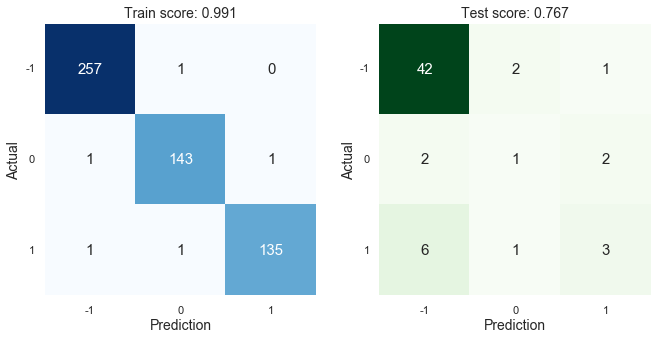

In [62]:
plot_confusion_matrix(x_train, y_train, x_test, y_test, model)

# Visualisasi

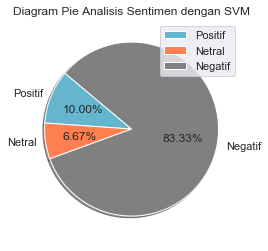

In [64]:
labels = ['Positif','Netral','Negatif']
Category1 = [6, 4, 50]
color = ['c', 'coral', 'grey']
plt.pie(Category1, labels=labels, colors=color, startangle=140, shadow=True, autopct='%1.2f%%')
plt.title('Diagram Pie Analisis Sentimen dengan SVM')
plt.legend()